In [136]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

import mglearn
warnings.filterwarnings(action='ignore')

random.seed(2022)
%matplotlib inline

## 인공 데이터
1. well-seperated dataset
2. seperated dataset
3. two moon

In [137]:
def standardization(Data):
    Input=((Data[['X', 'Y']]-np.mean(Data[['X', 'Y']], axis=0)) / np.std(Data[['X', 'Y']], axis=0))
    return(pd.concat([Input,Data['Class']],axis=1))

In [138]:
WellSeparated=standardization(pd.read_csv('well-separated dataset.csv'))
Twomoon=standardization(pd.read_csv('Twomoon dataset.csv'))
Seperated=standardization(pd.read_csv('Seperated dataset.csv'))

In [139]:
WellSeparated.head()

,X,Y,Class
0,-1.065202,1.300628,1
1,-0.991417,1.194477,1
2,-1.047240,1.834586,1
3,-1.096424,1.995751,1
4,-1.028580,1.834538,1


In [140]:
Artificial_Dataset={'WellSeparated': WellSeparated,'Twomoon': Twomoon, 'Seperated': Seperated}

In [141]:
def Data_Info(Data,NAME):
    print(NAME,'=','nrow',np.shape(Data)[0],'/ ncol:',np.shape(Data)[1]
         ,"/ class:",Data.iloc[:,2].nunique())
    
print("각각의 2차원 데이터 갯수는 아래와 같음")
for name in Artificial_Dataset.keys():
    Data_Info(Artificial_Dataset[name],name)

각각의 2차원 데이터 갯수는 아래와 같음
WellSeparated = nrow 500 / ncol: 3 / class: 5
Twomoon = nrow 600 / ncol: 3 / class: 2
Seperated = nrow 600 / ncol: 3 / class: 3


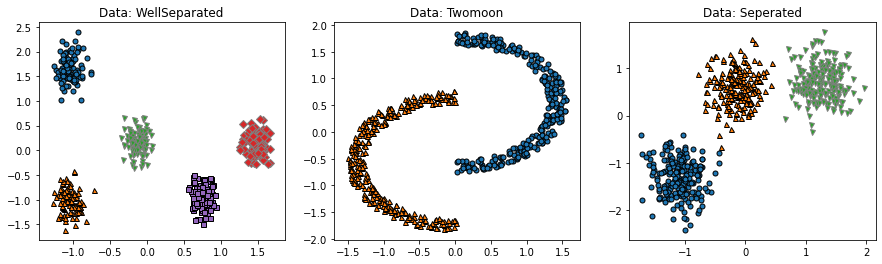

In [142]:
fig, axes=plt.subplots(1,3,figsize=(15,4))

i=0
for name in Artificial_Dataset.keys():
    Data=Artificial_Dataset[name]
    mglearn.discrete_scatter(Data['X'],Data['Y'],Data['Class'],ax=axes[i],s=5)
    #discrete_scatter: matplotlib과 비슷, 첫번째축 두번째축 들어가고 클래스 정보도 들어감
    axes[i].set_title("Data: "+ name)
    i+=1

# 분리형 군집화- K-Means clustering
- 전체 데이터의 영역을 특정 기준에 의해 동시에 구분
- 각 객체들은 사전에 정의된 군집 수 중 하나에 속하는 결과를 도출

## 1. K-Means 알고리즘 학습 예시

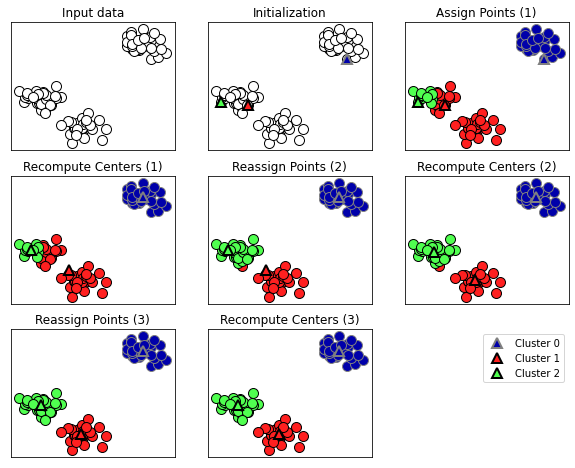

In [143]:
mglearn.plots.plot_kmeans_algorithm()

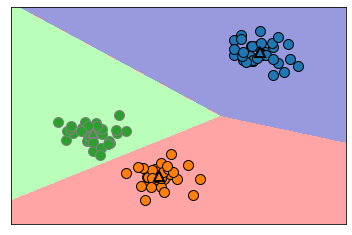

In [144]:
mglearn.plots.plot_kmeans_boundaries()

## K-means Clustering

In [145]:
Kmeans_Clustering=KMeans(verbose=1)
Kmeans_Clustering.fit(WellSeparated[['X','Y']])
# fit: 초기 중심값이 주어지고 초기 중심값이 업데이트 된다. label update
# n_clusters: default=8
# n_init: default=10, 초기 centroid에 따라 영향을 받으므로 초기값을 여러번 받아서 반복
# max_iter: 최대 iteraiton 
# verbose:함수 수행시 발생하는 상세한 정보들을 표준 출력으로 자세히 내보낼 것인가(0: 출력x, 1:자세히 출력)

Initialization complete
Iteration 0, inertia 26.721250175612518
Iteration 1, inertia 22.49572576494903
Iteration 2, inertia 21.91296169686845
Iteration 3, inertia 21.6639945649428
Iteration 4, inertia 21.445648798396512
Iteration 5, inertia 21.418845273219368
Iteration 6, inertia 21.39092494935351
Iteration 7, inertia 21.370974760238163
Converged at iteration 7: center shift 9.939355537495013e-05 within tolerance 0.00010000000000000007.
Initialization complete
Iteration 0, inertia 27.20917702882814
Iteration 1, inertia 21.240110965729084
Iteration 2, inertia 21.008770476492824
Iteration 3, inertia 20.955628471839933
Iteration 4, inertia 20.926853027571468
Iteration 5, inertia 20.910337942514598
Iteration 6, inertia 20.899696341346143
Converged at iteration 6: center shift 2.762579512185196e-05 within tolerance 0.00010000000000000007.
Initialization complete
Iteration 0, inertia 29.74128762523874
Iteration 1, inertia 22.093724414903505
Iteration 2, inertia 21.908450370241376
Iteration 3

KMeans(verbose=1)

In [146]:
Kmeans_Clustering.cluster_centers_.shape
# 8개의 cluster가 나옴 2차원

(8, 2)

In [147]:
Kmeans_Clustering.cluster_centers_
# cluster_centers_: 중심값들
# 8개의 중심값이 구해졌다

array([[ 1.47951242,  0.15277683],
       [-1.07344942, -0.81970836],
       [-1.04278739,  1.48005485],
       [ 0.74226224, -0.78189177],
       [-0.12982074,  0.15599334],
       [ 0.74908432, -1.14776366],
       [-1.04476836,  1.90633391],
       [-1.0306253 , -1.19351931]])

In [148]:
Kmeans_Clustering.inertia_
# inertia: sum of squared distances of samples to their closet cluster center(유클리디안 제곱 거리의 sum평가 좌표 가능)

19.23750201961621

In [149]:
WellSeparated.shape

(500, 3)

In [150]:
Kmeans_Clustering.labels_
# 500개 관측지에 대한 각각의 label(0~7까지 나옴 군집의 수가 8개)

array([2, 2, 6, 6, 6, 6, 6, 6, 6, 2, 6, 2, 2, 6, 6, 2, 2, 2, 6, 2, 6, 2,
       6, 2, 2, 2, 6, 2, 2, 6, 2, 2, 6, 2, 2, 2, 2, 6, 2, 2, 6, 6, 2, 2,
       6, 2, 6, 6, 2, 6, 2, 6, 6, 2, 2, 6, 2, 2, 2, 6, 6, 2, 6, 2, 2, 2,
       2, 6, 2, 6, 2, 6, 2, 2, 6, 6, 2, 2, 6, 6, 2, 2, 6, 2, 2, 6, 2, 2,
       2, 6, 2, 6, 6, 2, 2, 2, 2, 6, 2, 2, 7, 7, 7, 7, 1, 7, 1, 1, 7, 7,
       1, 7, 1, 1, 7, 1, 7, 7, 1, 1, 1, 7, 1, 1, 7, 1, 1, 1, 7, 7, 1, 1,
       7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 7, 1, 7, 1, 7, 7, 7,
       7, 1, 7, 7, 1, 7, 7, 1, 7, 7, 7, 1, 1, 1, 7, 7, 7, 7, 1, 1, 1, 1,
       1, 7, 1, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 7, 7, 1, 7, 7, 7, 1,
       7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0,

In [151]:
Kmeans_Clustering=KMeans(n_clusters=10,verbose=0)
Kmeans_Clustering.fit(WellSeparated[['X','Y']])
# fit: 초기 중심값이 주어지고 초기 중심값이 업데이트 된다. label update
# n_clusters: default=8
# n_init: default=10, 초기 centroid에 따라 영향을 받으므로 초기값을 여러번 받아서 반복
# max_iter: 최대 iteraiton 
# verbose:함수 수행시 발생하는 상세한 정보들을 표준 출력으로 자세히 내보낼 것인가(0: 출력x, 1:자세히 출력)

KMeans(n_clusters=10)

In [152]:
Kmeans_Clustering.inertia_
#inertia_: 군집을 평가하는 척도가 될 수 있지만 군집의 개수가 많아질수록 줄어들기에 얘만 가지고는 평가할 수 없다.

13.399700877810146

In [153]:
#Kmeans_Clustering.predict()
# Predict the closest cluster each sample

In [154]:
Kmeans_Clustering1=KMeans(n_clusters=8)
Kmeans_Clustering2=KMeans(n_clusters=10)
Kmeans_Clustering3=KMeans(n_clusters=5)

Kmeans_Clustering1.fit(WellSeparated[['X','Y']])
Kmeans_Clustering2.fit(WellSeparated[['X','Y']])
Kmeans_Clustering3.fit(WellSeparated[['X','Y']])

KMeans(n_clusters=5)

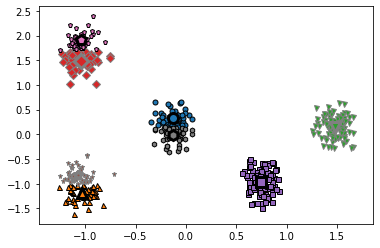

In [155]:
mglearn.discrete_scatter(WellSeparated['X'],WellSeparated['Y'], Kmeans_Clustering1.labels_,s=5);
mglearn.discrete_scatter(Kmeans_Clustering1.cluster_centers_[:,0],
                         Kmeans_Clustering1.cluster_centers_[:,1],list(range(8)),
                         markeredgewidth=3, s=10);

In [156]:
silhouette_score(WellSeparated[['X','Y']], Kmeans_Clustering1.labels_)
# silhouette_score: inputdata와 label 넣어주면된다

0.5867580110910064

In [157]:
silhouette_score(WellSeparated[['X','Y']], Kmeans_Clustering2.labels_)

0.45519128815256976

In [158]:
silhouette_score(WellSeparated[['X','Y']], Kmeans_Clustering3.labels_)

0.7896977264012118

# 계층적 군집화- 병합 군집화(Agglomerative Clustering)
- 개체들을 가까운 집단부터 차근차근 묶어 나가는 방식
- 군집화 결과 뿐만 아니라 유사한 개체들이 결합되는 절차도 생성

- cluster 개수 안 넣어줘도 작동
- n_clusters:안 넣어줘도 되지만 default=2
 - 개수 결정되지 않아야 할 때(None): 덴드로그램의 어떤 기준으로 잘라서 군집의 개수를 만드는데 distance_threshold 생기면 개수 결정 안 해도 된다
- affinity: 어떤 거리를 사용할지(ex, 맨하탄, 유클리드,,)
- linkage: 군집간 거리 계산 방식

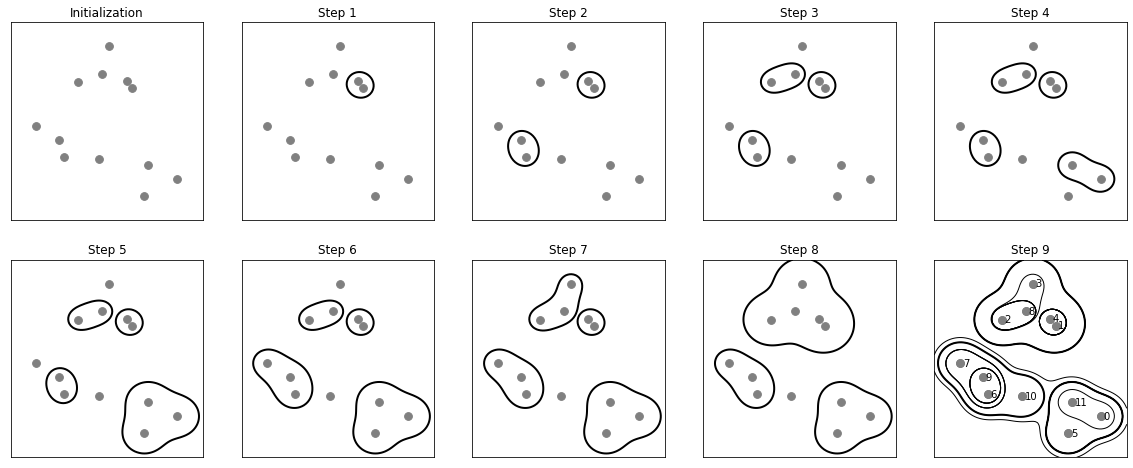

In [167]:
mglearn.plots.plot_agglomerative_algorithm()
mglearn.plots.plot_agglomerative()

In [174]:
H_Clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,

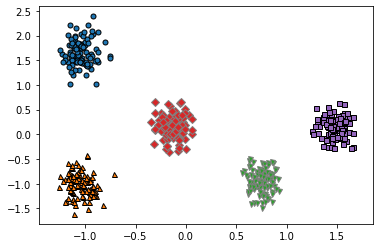

In [171]:
H_Clustering=AgglomerativeClustering(n_clusters=5,affinity='euclidean',
                                 linkage='ward')

H_Clustering.fit(WellSeparated)

P_Labels=H_Clustering.fit_predict(WellSeparated)
mglearn.discrete_scatter(WellSeparated['X'],WellSeparated['Y'],P_Labels,s=5)

In [199]:
def Fixed_Dendrogram(Data,Num_of_p,Full_Use):
    Linkage_Matrix=linkage(Data,'complete')
    
    if(Full_Use==True):
        Num_of_p=np.shape(Data)[0]
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('sample index')
        
    else:
        plt.title('Hierarchical Clustering Dendrogram(truncate)')
        plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    dendrogram(
        Linkage_Matrix,
        truncate_mode='lastp',
        p=Num_of_p,
        leaf_rotation=90,
        leaf_font_size=12,
        color_threshold='default')
    plt.show()

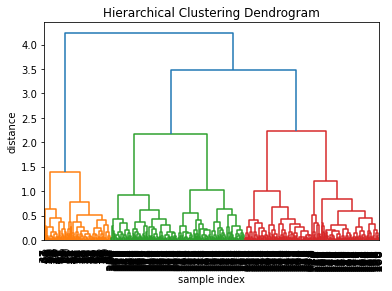

In [200]:
Fixed_Dendrogram(WellSeparated[['X','Y']],-1,True)

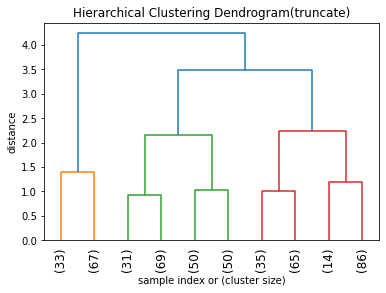

In [201]:
a=Fixed_Dendrogram(WellSeparated[['X','Y']],10,False) # 잘라내면 보기 더 편함

#### well seperated dataset을 통해 complete linkage에 대한 dendrogram 시각화

In [176]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

In [184]:
Linkage_Matrix=linkage(np.array(WellSeparated[['X','Y']]),method='ward',metric='euclidean')

In [185]:
Linkage_Matrix.shape

(499, 4)

In [193]:
X=[[i] for i in [1,1,2,2.5,4]]

In [194]:
X

[[1], [1], [2], [2.5], [4]]

In [195]:
Z=linkage(np.array(X),method='ward', metric='euclidean')
Z.shape

(4, 4)

In [196]:
Z

array([[0.        , 1.        , 0.        , 2.        ],
       [2.        , 3.        , 0.5       , 2.        ],
       [5.        , 6.        , 1.76776695, 4.        ],
       [4.        , 7.        , 3.00416378, 5.        ]])

linkage: 군집의 프로세스를 벹어준다
- 0번째와 1번째 index 묶겠다(1과 1 묶음) / 거리: 둘다 1이므로 동일해서 거리 0 / 군집 갯수: 2
- 2번째와 3번째 index 묶겠다(2와 2.5 묶음) / 거리: 0.5 / 군집 갯수: 2
- 0,1묶은 것과 2,3 묶은 것을 묶음(1,1과 2,2.5를 묶음) / 거리: 1.76... / 군집 갯수: 4


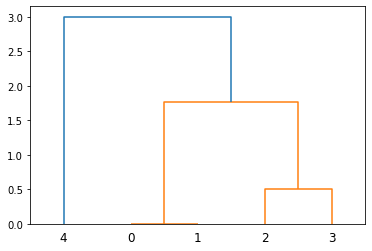

In [197]:
dendrogram(Z)
plt.show()